# PYTHON VERSION

In [1]:
import sys
print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


# THEOREM
If the sequence $\{\pi_n\}_n$ of the distributions of a Markov chain $\{X_n\}_{n \in \mathbb{N}}$, with transition probability matrix $P$, converges to the distribution $\pi(x)\in \mathcal{M}(\mathbb{X})$ then: 


$$\pi =\pi P, \text{ or equivalently } \pi(x)= \sum_{y \in \mathbb{X}}\pi(y)p(y,x), \ \forall \ x \in \mathbb{X}.$$

##  Example

In this example the above Theorem will be confirmed experimentally for a chain on $\mathbb{X} = \{1, 2, 3, 4\}$
with a transition probability matrix

$$
P = 
\begin{pmatrix}
0 & 1/2 & 1/2 & 0 \\
1/3 & 0 & 0 & 2/3 \\
0 & 0 & 4/5 & 1/5 \\
3/5 & 0 & 0 & 2/5  
\end{pmatrix}
$$

The following code simulates $N=100,000$ walks around the state $1$ and estimates
with Monte Carlo the expected number of visits to each state during a walk around state $1$.

In [2]:
from simple_markov_chain_lib import markov_chain

## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

init_dist = {1: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.

mc = markov_chain(markov_table, init_dist)

N = 100_000

##Initialize the dictionary "visits". Every state is a key of this dictionary, with value 0
visits = {state: 0 for state in (1, 2, 3, 4)} 

mc.start()
completed = 0

##Simulate N excursions. Every time we complete an excursion we increase completed by 1.
while completed < N:
    visits[mc.running_state] += 1
    mc.move()
    if mc.running_state == 1:
        completed +=1

print("Expected Visits starting from 1:")
for x, y in visits.items():
    print("%d: %.3f" % (x, y / N))


Expected Visits starting from 1:
1: 1.000
2: 0.501
3: 2.501
4: 1.389


## Application

If a point is chosen randomly (in a uniform way) from a square $S$ with center $(0,0)$ and side length $2$, the probability that this point \say{falls} on the unit disk $D = \{(x, y) \in S : x^2 + y^2 < 1\}$ is

$$ p = \frac{\left|\,D\,\right|}{\left|\, S\,\right|} = \frac{\pi}{4} $$

The code in the cell below uses this simple observation to numerically estimate $\pi$. It produces a large number (`Ntrials`) of points with uniform distribution in $S$. $X_i$ is equal to 1 or 0, depending on whether or not the $i$-point belongs to the unit disk $D$. The $${X_i}_i$$ are independent random variables with distribution $Be(p)$. Their sum (`Nhits`) is the number of points that fell on $D$. The \textbf{law of large numbers} yields that, for large Ntrials, the percentage of points that fell on $D$ (`Nhits/Ntrials`) is a good estimator of $p=\pi/4$. The last two lines of code show the actual value of $\pi$ and the % error of the estimate.

In [3]:
from numpy import random, pi

Ntrials, Nhits = 1_000_000, 0
for n in range(Ntrials):
    x, y = random.uniform(-1, 1, 2) # draw 2 samples, each uniformly distributed over (-1,1)
    if x**2 + y**2 < 1:
        Nhits += 1

print("Monte Carlo estimator of Pi: %.5f" % (4 * Nhits / Ntrials))
print("Actual value of Pi up to 5 decimal digits: %.5f" % pi)
print("The relative error is %.5f%%" % (100 * abs(1- (4 * Nhits)/(pi * Ntrials))))

Monte Carlo estimator of Pi: 3.14247
Actual value of Pi up to 5 decimal digits: 3.14159
The relative error is 0.02799%


The above idea also allows for sampling with uniform distribution on the unit disk $D$. 

1. A point in $S$ is chosen randomly (in a uniform way).
2. If it belongs to $D$, it gets stored. Otherwise, return to step (1). 

In other words, points $X$ in $S$ are randomly selected and continue the process until a point that belongs to $D$ is selected. 
This sampling method is called the \textbf{rejection sampling method}. The fact that at the output of the algorithm a point $Y$ with a uniform distribution in $D$ is returned, can be verified by the following calculation

$$\mathbb{P}\big[Y\in A\subset D\big]=\mathbb{P}\big[X\in A\,\big|\, X\in D\big]=\frac{\mathbb{P}\big[X\in A\cap D\big]}{\mathbb{P}\big[X\in D\big]}=\frac{|\, A\,|}{|\, D\,|}$$

In the cell below this technique is used to produce 10,000 random points in $D$. 
At the same time, the discarded points are also stored.

In [4]:
# Parameters
N = 10_000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if x**2 + y**2 < 1:
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the disk %d" % N)


Total number of samples drawn 12778
Number of samples in the disk 10000


The points that belong to the disc are coloured green and the points that do not belong to the disc are coloured red.

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

<Figure size 640x480 with 1 Axes>

## Application

Continuing in the jupyter notebook you opened for Deliverable 1, answer the following questions.

#### (I)

Consider $N=10^6$ samples in the cube with center (0,0,0) and side 2. Estimate the volume of the unit sphere in 3 dimensions and compare with the theoretical value $V(3) = \frac{4 \pi}{3}$. Your code should print the estimated value of $V(3)$, its theoretical value, and the relative error of the estimate.  


#### (II) 

Obtain a sample of $N=10,000$ points with a uniform distribution in the lemma  

$$ L = \{ (x, y) \in \mathbb{R}^2: \{ (x^2 + y^2) \} ^2 \leq 2 |xy| ) \} $$

Your code should also:

1. construct a diagram where the points you rejected and the points in $L$ are shown in a different color and
2. return the number of samples in $S$ that it took to produce $N$ samples in $L$

#### (III)

Write code that estimates the area of $L$ and the value of the integral

$$ I = \iint_{L}\, |x + y| \, {dxdy} $$

(Hint: If $X=(X_1,X_2)$ is a random vector with a uniform distribution in the lattice $L$, then the quantity $I/||,L\,|$ is the mean value $\mathbb{E}\big[\,|\,X_1+X_2\,|\,\big]$.)

In [6]:
# Application I

from numpy import random, pi
# Parameters
N = 1_000_000  # number of required points
Ntrials, Nhits = 0, 0

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y, z = random.uniform(-1, 1, 3)
    if x**2 + y**2 + z**2< 1:
        Nhits += 1

print("Monte Carlo estimator of V(1)=4π/3: %.5f" % (8*Nhits/Ntrials))
print("Actual value of V(1)=4π/3 up to 5 decimal digits: %.5f" % (4.0/3.0*pi))
print("The relative error is %.5f%%" % (100 * abs(1-8*Nhits/Ntrials/(4.0/3.0*pi))))

Monte Carlo estimator of V(1)=4π/3: 4.19022
Actual value of V(1)=4π/3 up to 5 decimal digits: 4.18879
The relative error is 0.03422%


Total number of samples drawn 200278
Number of samples in the designated area 100000


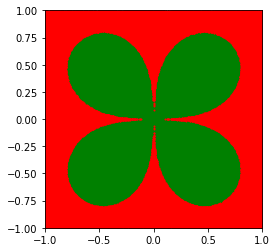

In [7]:
# Application II
# Parameters
N = 100_000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if (x**2 + y**2)**2 <= 2*abs(x*y):
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the designated area %d" % N)
# Plotting 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

In [8]:
# Application III
from numpy import random
# Parameters
N = 1_000_000  # number of required points
Ntrials, Nhits = 0, 0
sum = 0

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if (x**2 + y**2)**2 <= 2*abs(x*y):
        Nhits += 1
        sum += abs(x + y)
mean = sum / N

print("Monte Carlo estimator of the area of L: %.5f" % (4*Nhits/Ntrials))
print("Estimation of the integral I: %.5f" % (4*Nhits/Ntrials*mean))

Monte Carlo estimator of the area of L: 2.00124
Estimation of the integral I: 0.99111
